In [1]:
import lightgbm as lgb
import numpy as np
from matplotlib import pyplot as plt

params = {
    'objective': 'regression',
    'metric': 'mse',
    'boosting': 'gbdt',
    'learning_rate': 0.06,
    'num_leaves': 64,
    'bagging_fraction': 0.9,
    'feature_fraction': 0.9
}

X = np.linspace(0, 100, 1000).reshape(-1,1) 
noise = np.random.normal(0, 200, 1000).reshape(-1,1) 
y = 10*X*np.sin(X) + X**2 + noise

n = 800
input_train, truth_train = X[:n,:], y[:n] 
input_validation, truth_validation = X[n:,:], y[n:] 

x_train = lgb.Dataset(input_train, truth_train)
model = lgb.train(params, x_train, num_boost_round=100)
# preds = model.predict(input_validation)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000161 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 1
[LightGBM] [Info] Start training from score 2125.578753
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

/Users/enaj/.virtualenvs/p39/lib/python3.9/site-packages/lightgbm/basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


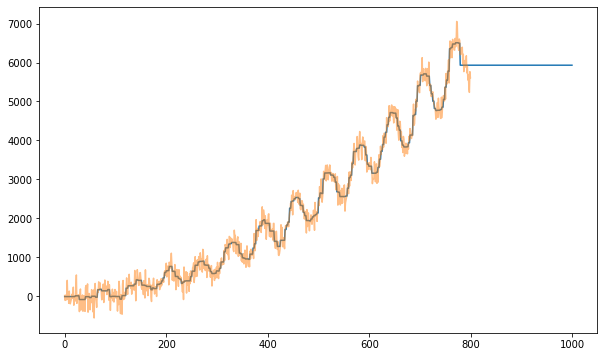

In [2]:
fig = plt.figure(figsize=(10,6))
preds = model.predict(X)
plt.plot(preds, label='Predictions', alpha=1)
plt.plot(truth_train, label='True', alpha=0.5)

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split

dataset_path = 'Aleph_dataset.csv'
data = pd.read_csv(dataset_path, index_col = 0)

data.head()

,energy,cTheta,phi,prob_b,spheri,pt2rel,multip,bqvjet,ptlrel,isb
0,46.8299,0.3871,0.8528,0.0327,0.2105,0.0302,0.4776,0.0314,-0.0003,0.0
1,45.6397,-0.3943,-2.2817,0.0035,0.3457,0.0314,0.3497,0.0106,-0.0003,0.0
2,48.8960,-0.4613,-0.6139,0.0649,0.0872,0.0254,0.1288,0.1074,-0.0003,0.0
3,39.1577,0.4668,2.4818,0.0027,0.1570,0.0147,0.2732,0.2117,0.0240,0.0
4,43.7354,-0.7642,1.7872,0.4320,0.4873,0.0505,0.3536,0.4578,-0.0003,1.0


In [71]:
predicing_variable = 'spheri'

feature_columns = data.columns
input_variables = data.columns[feature_columns != predicing_variable]
input_data      = data[input_variables]
truth           = data[predicing_variable]
print(input_variables)


Index(['energy', 'cTheta', 'phi', 'prob_b', 'pt2rel', 'multip', 'bqvjet',
       'ptlrel', 'isb'],
      dtype='object')


In [74]:
input_train, input_validation, truth_train, truth_validation = train_test_split(input_data, truth, test_size=0.2)

params = {
    'objective': 'regression',
    'metric': 'mas',
    'boosting': 'gbdt',
    'learning_rate': 0.06,
    'num_leaves': 64,
    'bagging_fraction': 0.9,
    'feature_fraction': 0.9
}

x_train = lgb.Dataset(input_train, truth_train)
model = lgb.train(params, x_train, num_boost_round=1000)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001784 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2042
[LightGBM] [Info] Number of data points in the train set: 27174, number of used features: 9
[LightGBM] [Info] Start training from score 0.364825


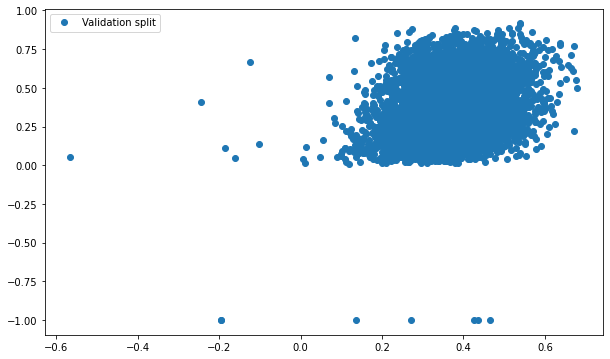

In [75]:
fig = plt.figure(figsize=(10,6))
preds = model.predict(input_validation)
plt.plot(preds, truth_validation, 'o', label='Validation split')
# plt.plot([0, 100], [0, 100], 'red', linewidth=1)
# plt.plot([-1, 1], [-1, 1], 'red', linewidth=1)
plt.legend()

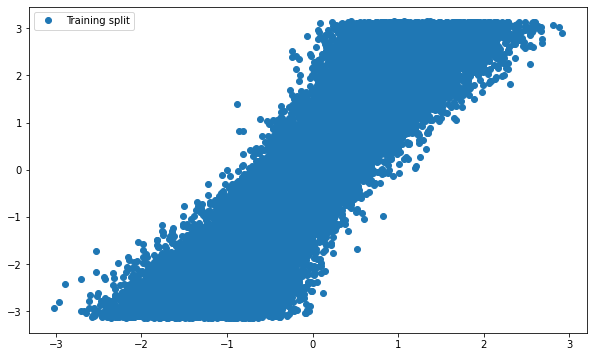

In [69]:
fig = plt.figure(figsize=(10,6))
preds = model.predict(input_train)
plt.plot(preds, truth_train, 'o', label='Training split')
# plt.plot([-1, 1], [-1, 1], 'red', linewidth=1)
# plt.plot([0, 100], [0, 100], 'red', linewidth=1)
plt.legend()

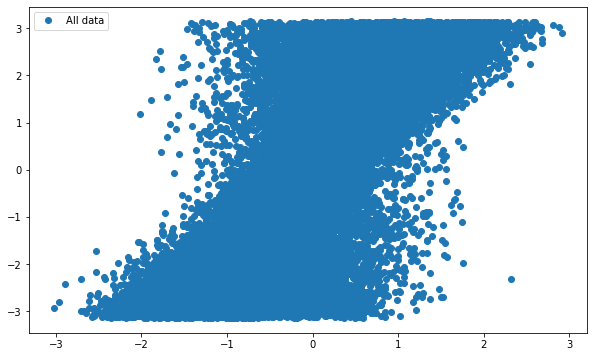

In [70]:
fig = plt.figure(figsize=(10,6))
preds = model.predict(input_data)
plt.plot(preds, truth, 'o', label='All data')
# plt.plot([0, 100], [0, 100], 'red', linewidth=1)
# plt.plot([-1, 1], [-1, 1], 'red', linewidth=1)
plt.legend()